# Previous Lesson Overview - Day 10 Pandas_Math

In the previous lesson you learned about dataframes: 

1. Introduction to math and stats with dataframes
2. Introduction to groupby and pivot tables

# Day 11: SEABORN
We will learn how to create plots from big datasets, bulding on the pandas skills we learned in the past three days.

# Goals:

Students will be able to :

1. Explore data with the seaborn plotting library
2. Write functions to make figures from daframes
3. Make figures with FacetGrid and save figures
4. Reference SciPy for stats

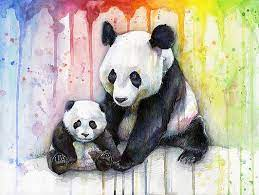

# System version when preparing this notebook
- python 3.8.11
- pandas 1.1.3
- numpy 1.20.3
- Seaborn 0.11.1

This lesson was prepared by Maria D Hernandez Limon for NRT Environment Science Bootcamps 2021. 

# Set-Up working Space

In [1]:
import pandas as pd
import numpy as np

import re
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

#seaborn - more advanced plotting options but always import matplotlib too as some seaborn utility comes from matplot
import seaborn as sns

##some libraries that allow is to run from stats 
import scipy
from scipy import stats

In [2]:
#sanity check my versions
print (pd.__version__)

1.1.3


In [3]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

# 17.  SEABORN
[seaborn](https://seaborn.pydata.org/) is a visualization tool based on matplotlib. 

You can look at the seaborn **[gallery](https://seaborn.pydata.org/examples/index.html)** and look at all the plotting options it offers.

we import as:

`import seaborn as sns` and after we load matplot.

Seaborn has both axes-level plotting functions and figure-level plotting functions.

If a seaborn plot has the following text in the description **'This is an Axes-level function'** then you need to map it on to a figure level object. If it says **'Figure-level interface for drawing relational plots onto a FacetGrid'** then you don't need to use map on to some figure level object because it already is one.

To plot we need to select some data.

In [4]:
temp_data=pd.read_csv(datadirectory+'Temp_data_2010-2020.csv')
temp_data

,Day,Year,Temp,Lake,Temp_F,date,Month
0,1,2010,2.53,SU,36.554,2010-01-01,1
1,2,2010,2.43,SU,36.374,2010-01-02,1
2,3,2010,2.32,SU,36.176,2010-01-03,1
3,4,2010,2.35,SU,36.230,2010-01-04,1
4,5,2010,2.24,SU,36.032,2010-01-05,1
...,...,...,...,...,...,...,...
19853,318,2020,10.46,ON,50.828,2020-11-13,11
19854,319,2020,10.24,ON,50.432,2020-11-14,11
19855,320,2020,10.16,ON,50.288,2020-11-15,11
19856,321,2020,10.20,ON,50.360,2020-11-16,11


In [6]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19858 entries, 0 to 19857
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     19858 non-null  int64  
 1   Year    19858 non-null  int64  
 2   Temp    19858 non-null  float64
 3   Lake    19858 non-null  object 
 4   Temp_F  19858 non-null  float64
 5   date    19858 non-null  object 
 6   Month   19858 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB


# 17.1 Axes-level plotting functions

# lineplot 
https://seaborn.pydata.org/generated/seaborn.lineplot.html

The hue option allows me to plot based on diff categories I have.

There are close to 20,000 points on this graph so using date in the x-axis is going to be messy no matter what we do.

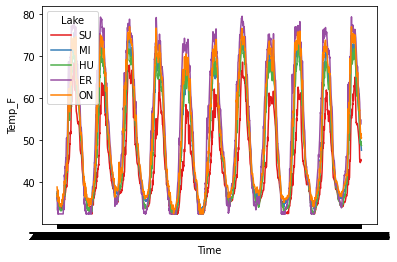

In [61]:
fig, ax = plt.subplots()

sns.lineplot(x="date", y="Temp_F", hue="Lake",data=temp_data,palette="Set1", ax=ax)

#to make changes we call ax and Katie taught us
ax.set_xlabel('Time')

plt.show()

Let's select less data so we can see the power of sns.lineplot and the **hue** option.

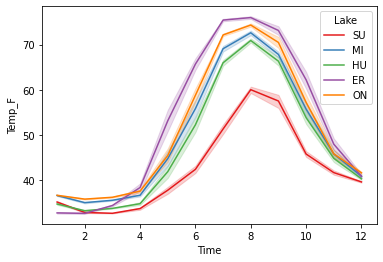

In [97]:
temp_data_2018=temp_data.loc[temp_data['Year']==2018,]

fig, ax = plt.subplots()

sns.lineplot(x="Month", y="Temp_F", hue="Lake",data=temp_data_2018,palette="Set1", ax=ax)

#to make changes we call ax and Katie taught us
ax.set_xlabel('Time')
plt.show()

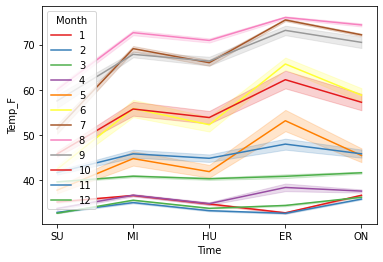

In [96]:
temp_data_2018=temp_data.loc[temp_data['Year']==2018,]

fig, ax = plt.subplots()

sns.lineplot(x="Lake", y="Temp_F", hue="Month",data=temp_data_2018,palette="Set1", ax=ax)

#to make changes we call ax and Katie taught us
ax.set_xlabel('Time')
plt.show()

This is a nice and clean example and the envolope shows us the spread of our data.

# heatplot - quick data analysis example
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [98]:
pokemon=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


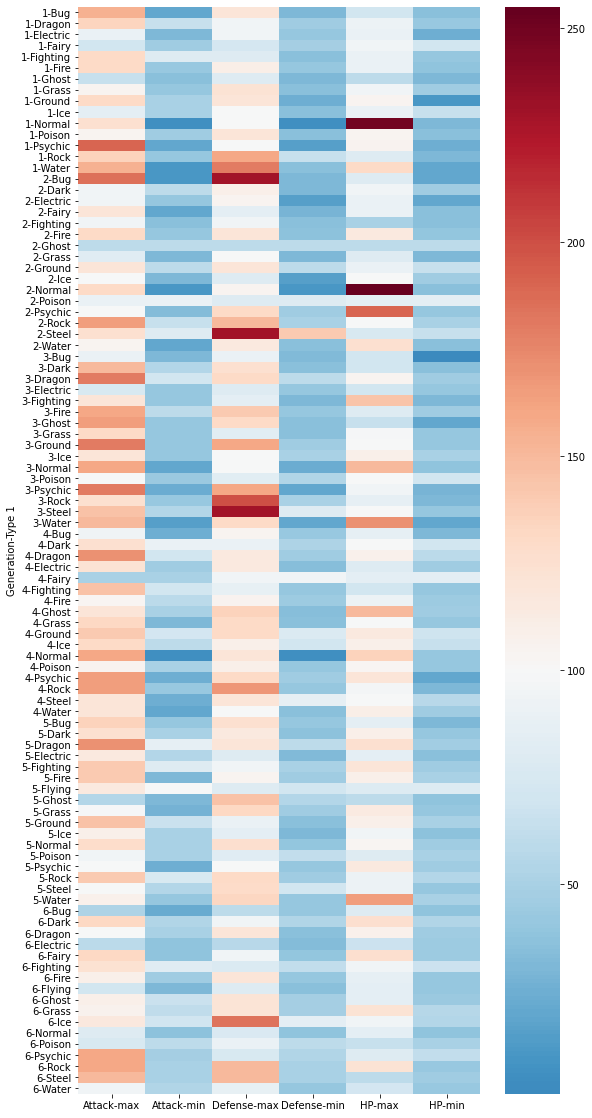

In [99]:
def make_heat(cols_to_keep,agg_fun_wanted):
    """With this function we can group type and generation by different power stats and get a hetaplot"""
    
    pokemon_grouped=pokemon.groupby(['Generation','Type 1'])[cols_to_keep].agg(agg_fun_wanted).reset_index().set_index(['Generation','Type 1'])
    
    #all these commands are matplot level commands
    fig, ax = plt.subplots()
    fig.set_size_inches(len(cols_to_keep)*3,20)
    sns.heatmap(pokemon_grouped,cmap="RdBu_r",center=100,ax=ax)
    ax.set_xlabel('')
    plt.show()

make_heat(['Attack','Defense','HP'],[max,min])

In [100]:
def find_pokemon(stat,strong_weak):
    """This function will help me identify the pokemon from the heat"""
    hold=pokemon.loc[:, ['Name',stat,'Legendary','Generation','Type 1']].sort_values(by=stat,ascending=False)
    if strong_weak =='strong':
        hold_out=hold.iloc[:5]
    else:
        hold_out=hold.iloc[-5:].sort_values(by=stat,ascending=True)
    return hold_out

find_pokemon('Attack','strong')

,Name,Attack,Legendary,Generation,Type 1
163,MewtwoMega Mewtwo X,190,True,1,Psychic
232,HeracrossMega Heracross,185,False,2,Bug
424,GroudonPrimal Groudon,180,True,3,Ground
426,RayquazaMega Rayquaza,180,True,3,Dragon
429,DeoxysAttack Forme,180,True,3,Psychic


# - colors and palettes
https://matplotlib.org/stable/tutorials/colors/colormaps.html

# 17.2 FacetGrid - Multi-plot grid for plotting conditional relationships.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

With FacetGrid you create a figure level object that you contains space for multiple subplots then you map plots onto each grid.

Thus we no longer need for loops to make gigures with subplots. There will be times when a for loop is the best option!

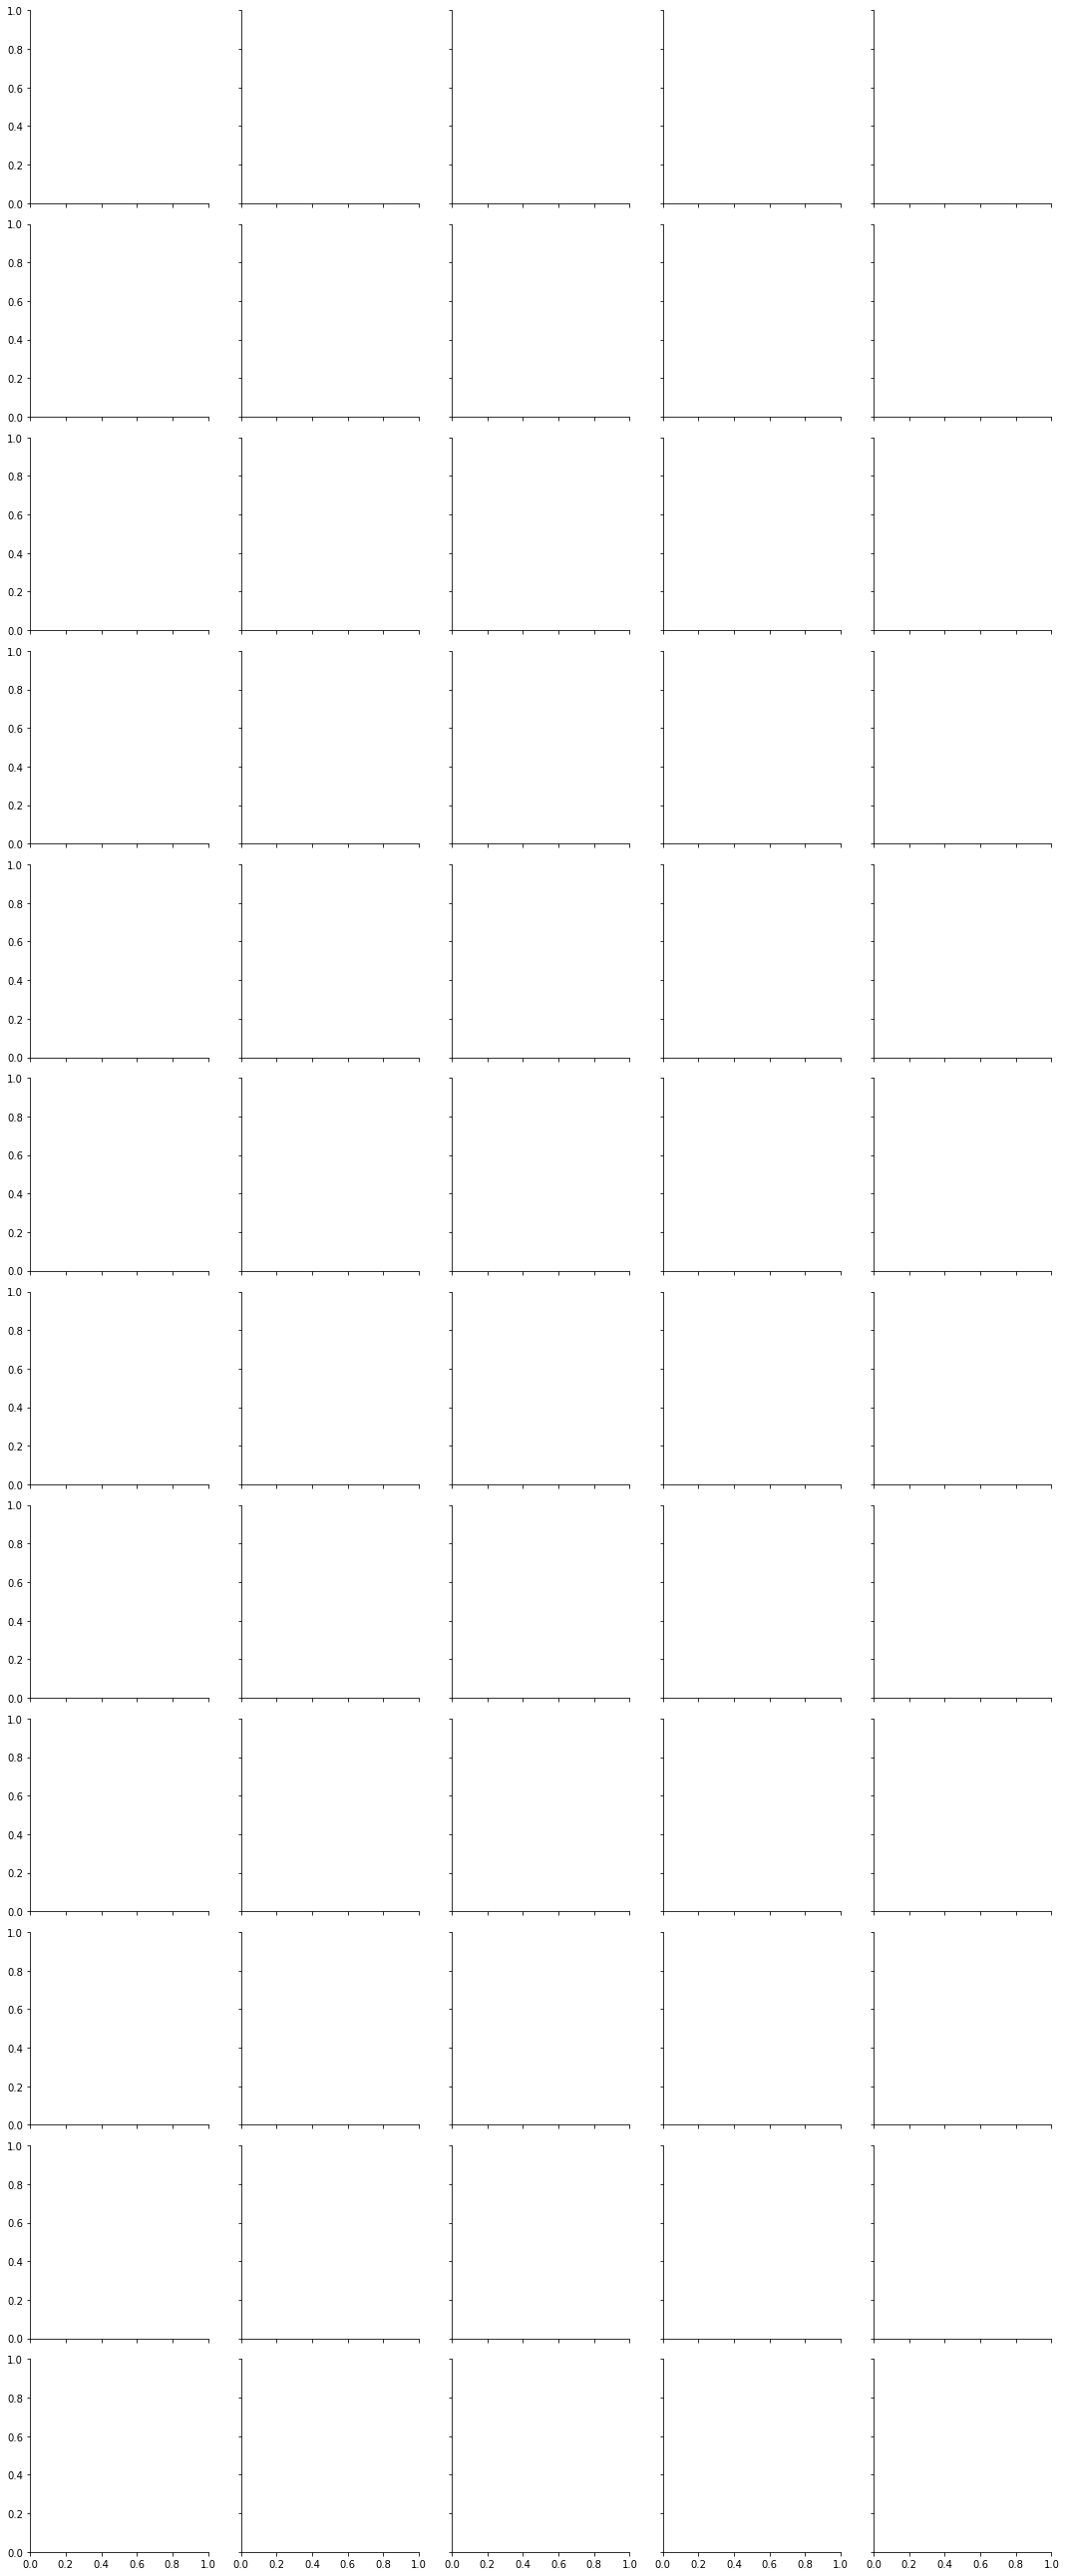

In [8]:
g= sns.FacetGrid(temp_data, col="Lake",  row="Month")
g

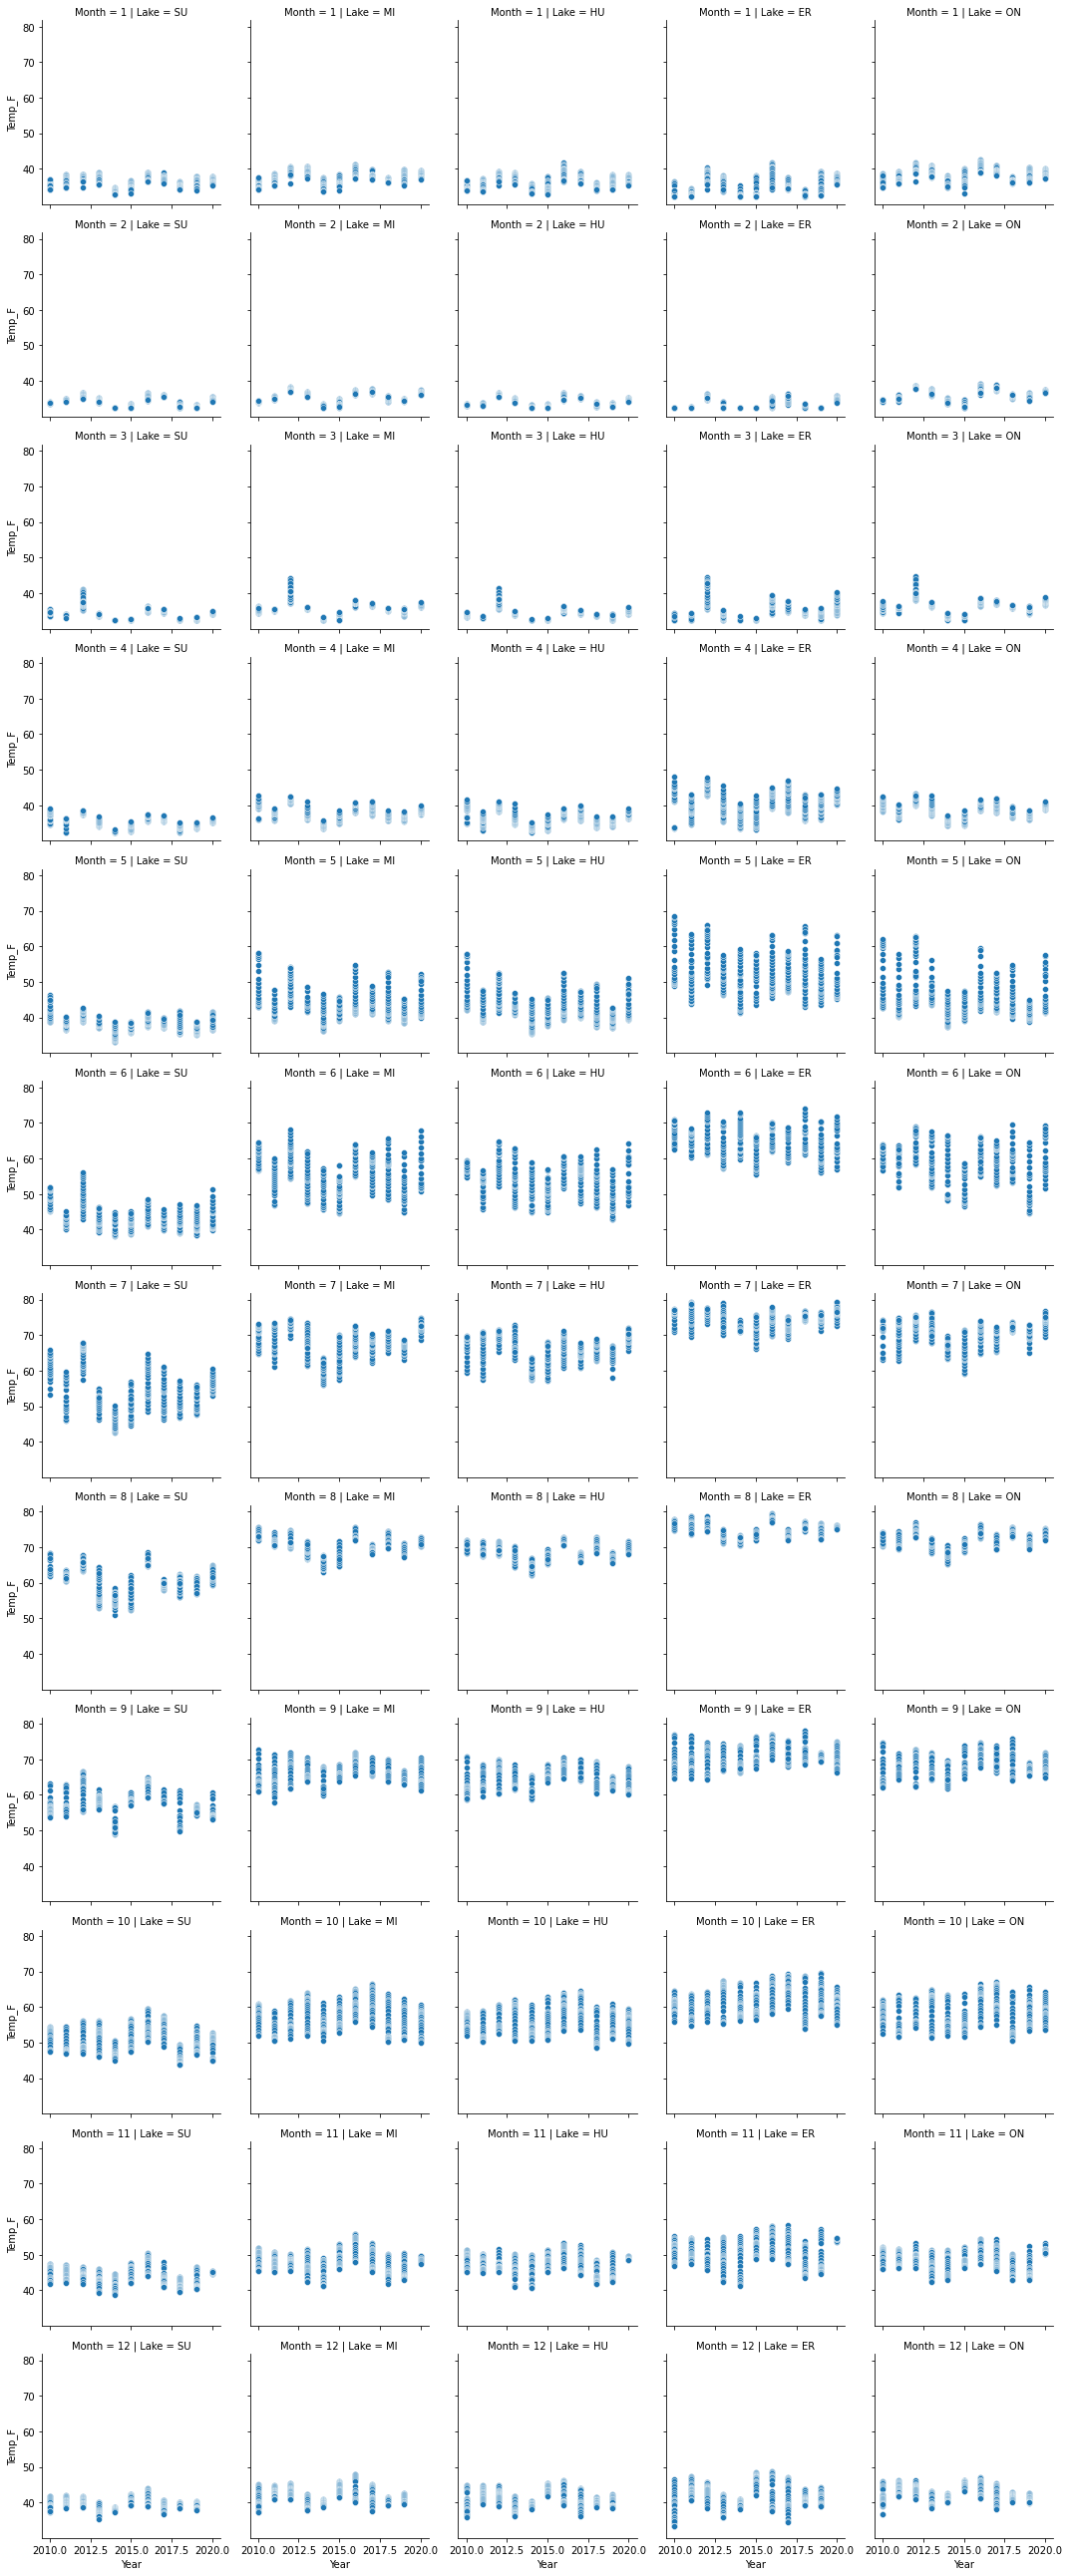

In [9]:
g = sns.FacetGrid(temp_data, col="Lake",  row="Month")
#scatterplot takes and x and y val so we pass them to the map function below
g.map_dataframe(sns.scatterplot, "Year", "Temp_F")

## make modifications to the figure by calling g.some_command
Here are some of the commands I use most often, see the facetgrid doc for more options.

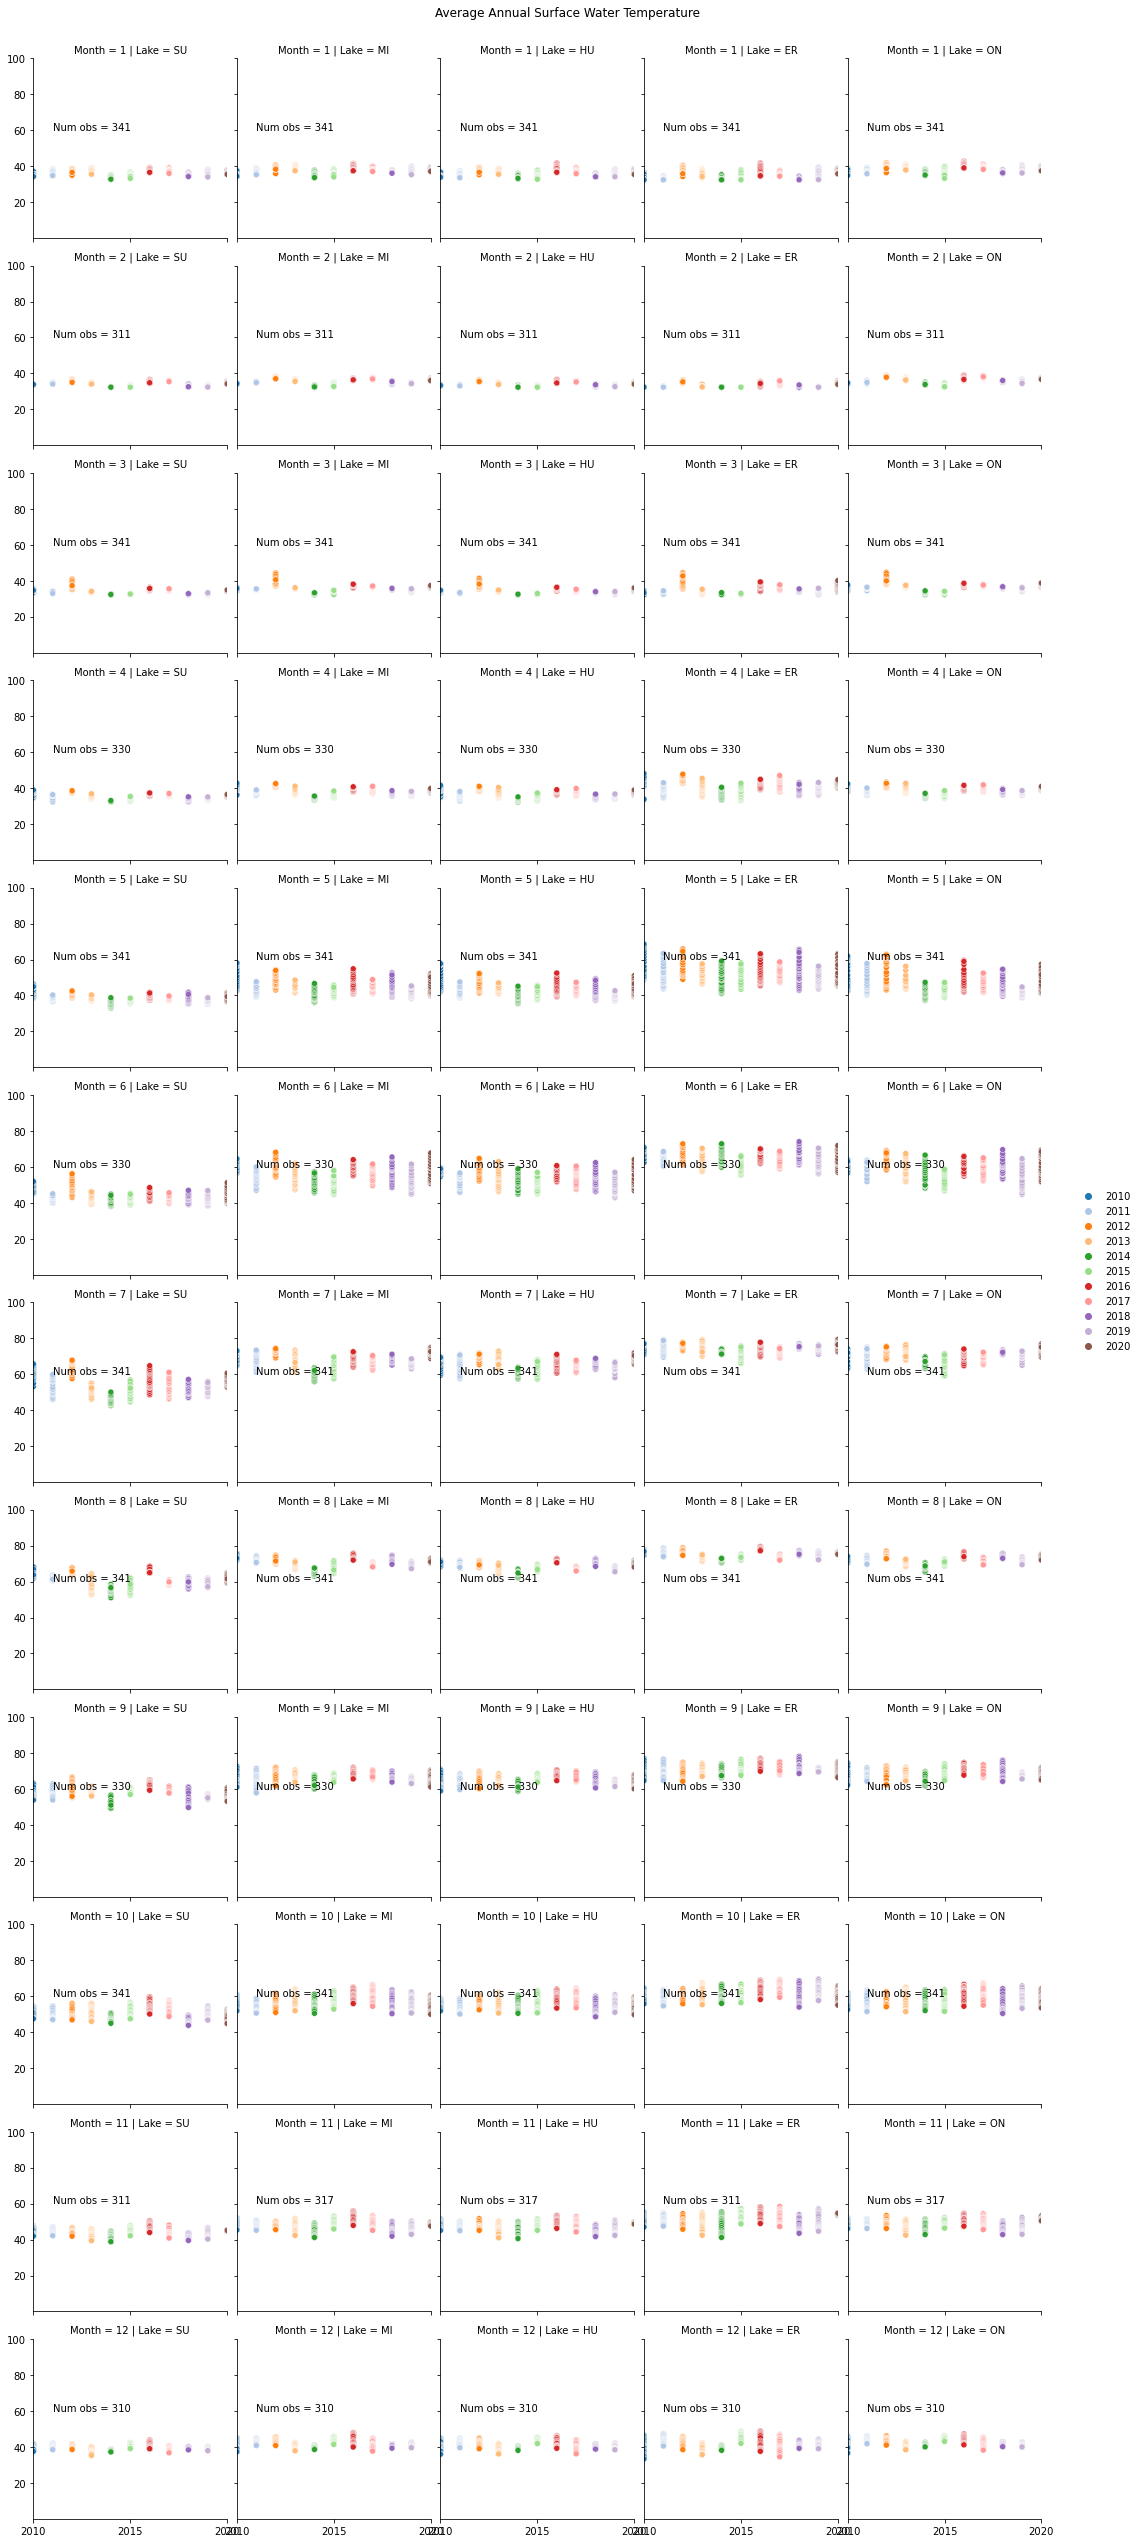

In [21]:
g = sns.FacetGrid(temp_data, col="Lake",  row="Month")
#scatterplot takes x and Y so we pass those to map_dataframe
g.map_dataframe(sns.scatterplot, "Year", "Temp_F",hue="Year",palette="tab20")

#main title
g.fig.suptitle(f'Average Annual Surface Water Temperature')

#subplot titles
g.set_titles(col_template="{col_name} Temp", row_template="month={row_name}")

#add legend
g.add_legend()

#labels (x,y)
g.set_axis_labels("Temperature F", "Time")

#limits
g.set(xlim=(2010, 2020), ylim=(0, 100), xticks=[2010, 2015, 2020], yticks=[20, 40, 60,80, 100])

#add text
def annotate(data, **kws):
    n = data.shape[0]
    ax = plt.gca()
    ax.text(.1, .6, f"Num obs = {n}", transform=ax.transAxes)
    
g.map_dataframe(annotate)

#set size -- I'll comment this for now so seaborn find the best size
#g.fig.set_size_inches(24,24)

#save
g.tight_layout()
g.fig.subplots_adjust(wspace=.05,top=.96)
#g.savefig(data_out_directory+"gl_facet_plot.png")

# 17.3 Pass on user define function to map

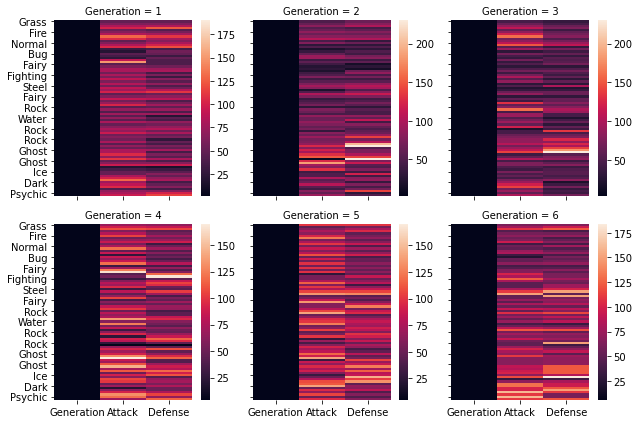

In [22]:
pokemon_for_heat=pokemon.loc[:,['Generation','Type 1','Attack','Defense']].set_index(['Type 1'])
g = sns.FacetGrid(pokemon_for_heat,col='Generation',col_wrap=3)

g.map_dataframe(sns.heatmap)

Let's create a function that get's rid of the generation column and then makes the heatplot.

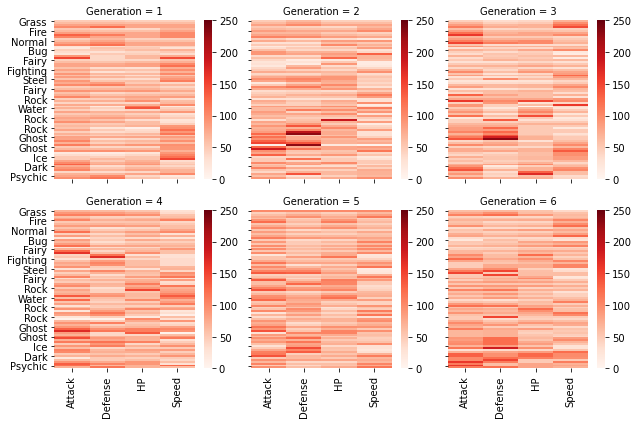

In [105]:
pokemon_for_heat=pokemon.loc[:,['Generation','Type 1','Attack','Defense','HP','Speed']].set_index(['Type 1'])
g = sns.FacetGrid(pokemon_for_heat,col='Generation',col_wrap=3)

def draw_heat(**kwargs):
    data = kwargs.pop('data')
    d = data.drop(['Generation'],axis=1)
    #pass vmin and vmax so all the legends are the same
    sns.heatmap(d,**kwargs)

#the draw_heat function will be applied in each of the subplots we created 
g.map_dataframe(draw_heat,cmap="Reds",vmin=0, vmax=250)

# 17.2 Skill Check

Violin plots- combination of box plot and kernel density plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

Violin plots are axes level figures. Use the methods I showed you above to make a 2 (rows) by 3 (cols) figure, where each subplot holds a violin plot for each generation(your col value, and x). The value represented in the violinplots is Attack (your y val) and I want a violin for each Type 1 (your hue val). 


In [ ]:
#set up your facetgrd here, I've already selected that we want 3 cols, update the col input
g = sns.FacetGrid(pokemon,col=your_column_here,col_wrap=3)

"""
Now let's map violinplot to the grid space we made- look at the violinplot documentation to see the variables
available,hint: You will need x,y,hue and I've already added palette.

g.map_dataframe(sns.violinplot,x=same_as_colum_above,
y=what_value_we_want_in_violin,hue=what_does_each_violin_represent,palette='tab20')"""


#your clean commands here
g.map_dataframe('add_code_here')

#let's add a legend- no more code needed
g.add_legend()

#add some labels- no more code needed
g.set_axis_labels("", "Attack")
#hide x ticks
g.set_xticklabels([])

#for figure size - no more code needed
g.fig.set_size_inches(16,6)


#let'see our plot
g

### KEY

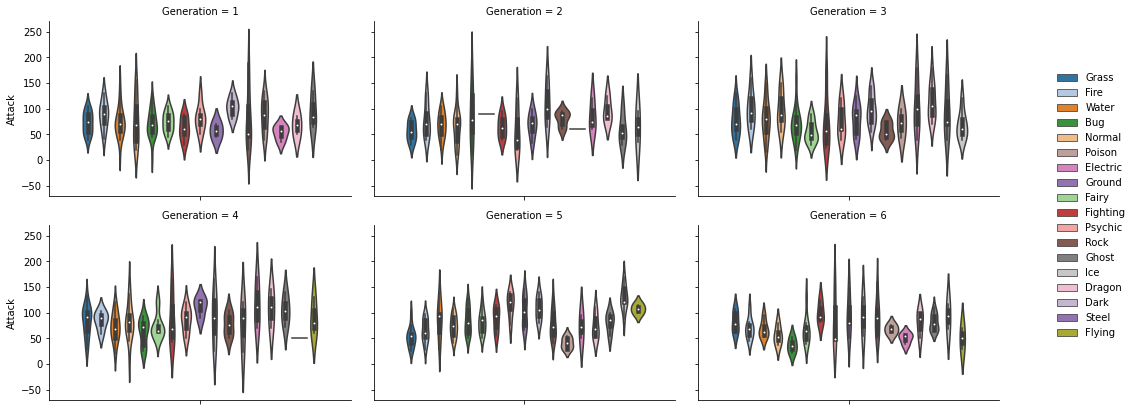

In [41]:
#set up your facetgrd here
g = sns.FacetGrid(pokemon,col='Generation',col_wrap=3)
#add plot
g.map_dataframe(sns.violinplot,x='Generation',y='Attack',hue='Type 1',palette='tab20')
#make some changes

#add legend
g.add_legend()
#change axis labels
g.set_axis_labels("", "Attack")
#make xticks empty
g.set_xticklabels([])
#change size
g.fig.set_size_inches(16,6)
#see figure
g

# 17.3 FacetGrid included - how to use

# - relplot
https://seaborn.pydata.org/generated/seaborn.relplot.html

relplot along with some other plot types (see facetgrid link) are bult on facetgrid so you don't have to map them. However you can cutomize the plot with the same commands I showed you above.

When a function already has facetgrid we can create subplots in by calling **col**, this will create new columns to match the categories in the column we called in 'col'. We can then change the layout/order of the subplots with **col_wrap** and **col_order**. Once you figure is made you can change other apects of the graph by calling g and making changes as I showed above.

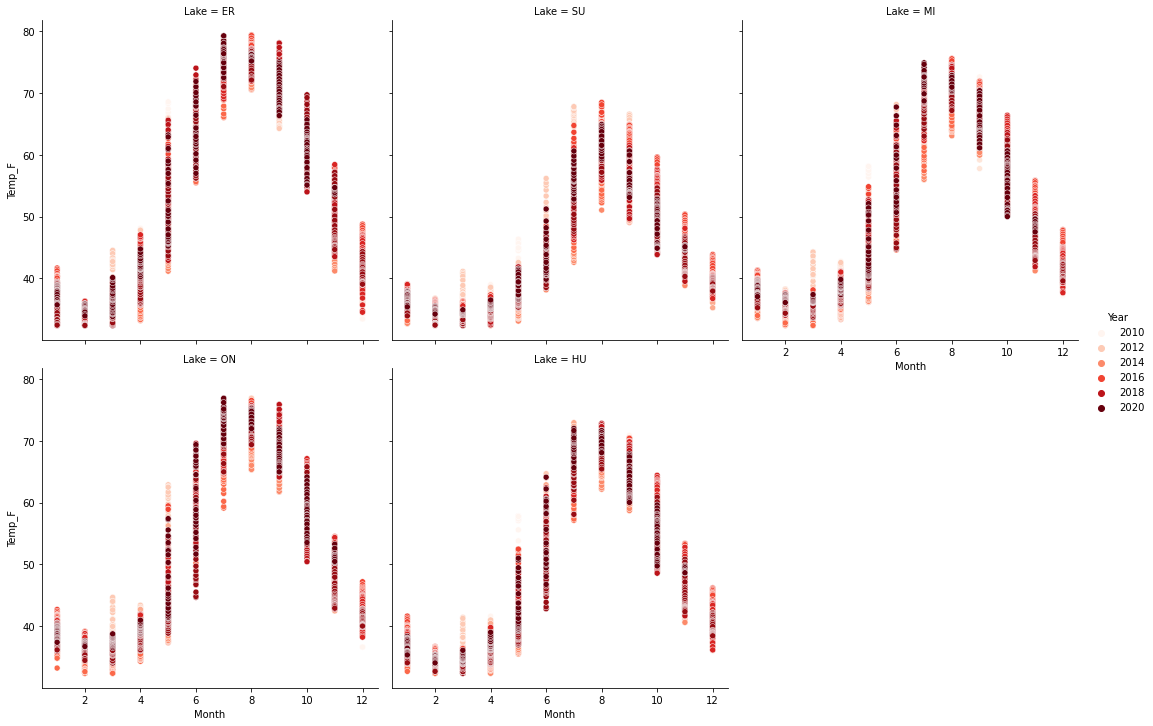

In [20]:
g=sns.relplot(data=temp_data,x="Month", y="Temp_F",hue='Year',col='Lake',kind='scatter',palette='Reds',
              col_wrap=3,col_order=['ER','SU','MI','ON','HU'])
g

# - lmplot 
https://seaborn.pydata.org/generated/seaborn.lmplot.html

Here is another examples, here I added new commands **order, height,aspect, and sharey**. These command can be directly passed on to your command to change aspects of the figure.

With sharey as false all my plots have a different y range now. This makes comparing across months difficult but I wanted to show you this option.

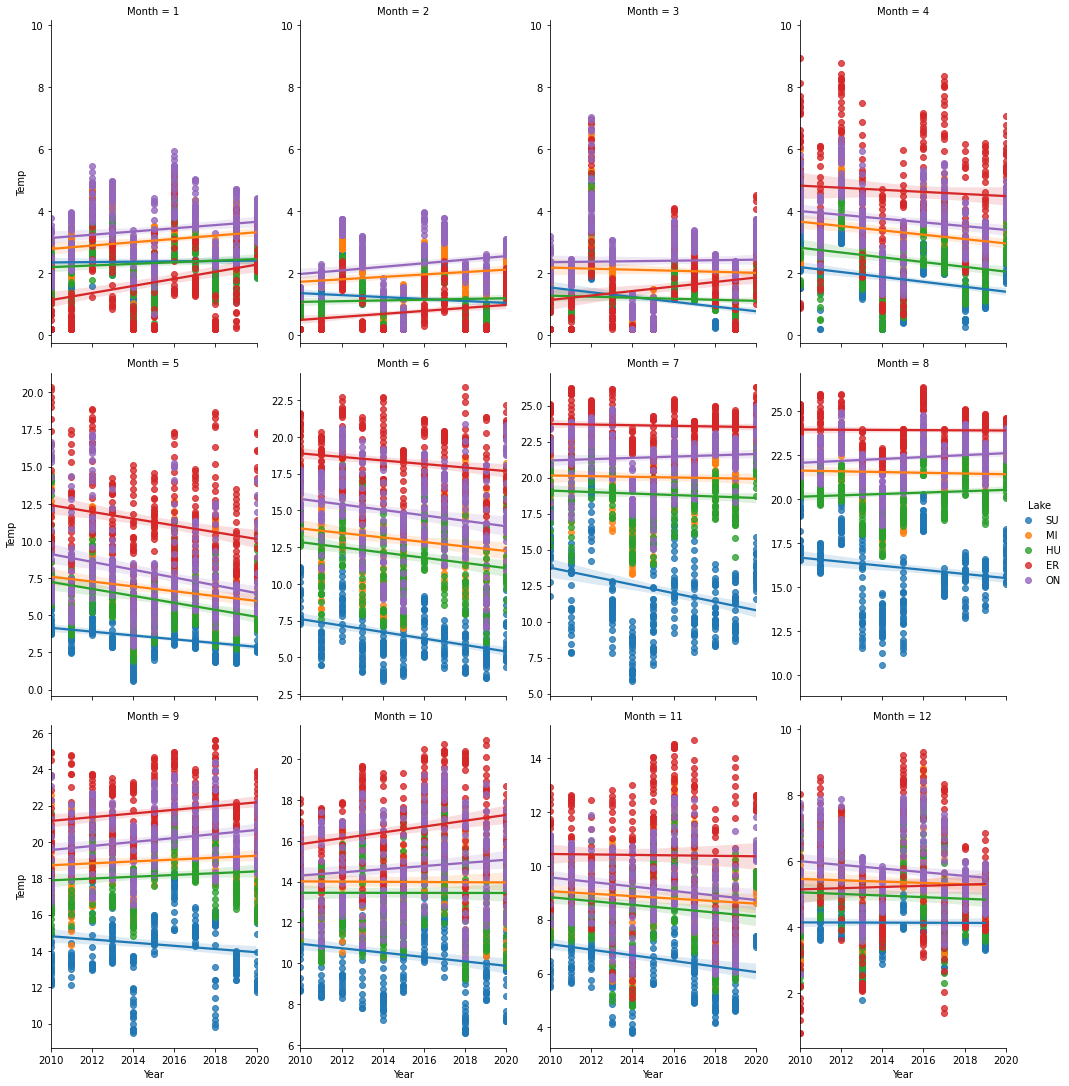

In [169]:
g=sns.lmplot(x="Year", y="Temp", hue="Lake", col='Month',data=temp_data,order=1,
           col_wrap=4, height=5, aspect=.7,sharey=False)
g

Let's have them sahre the y-axis again.

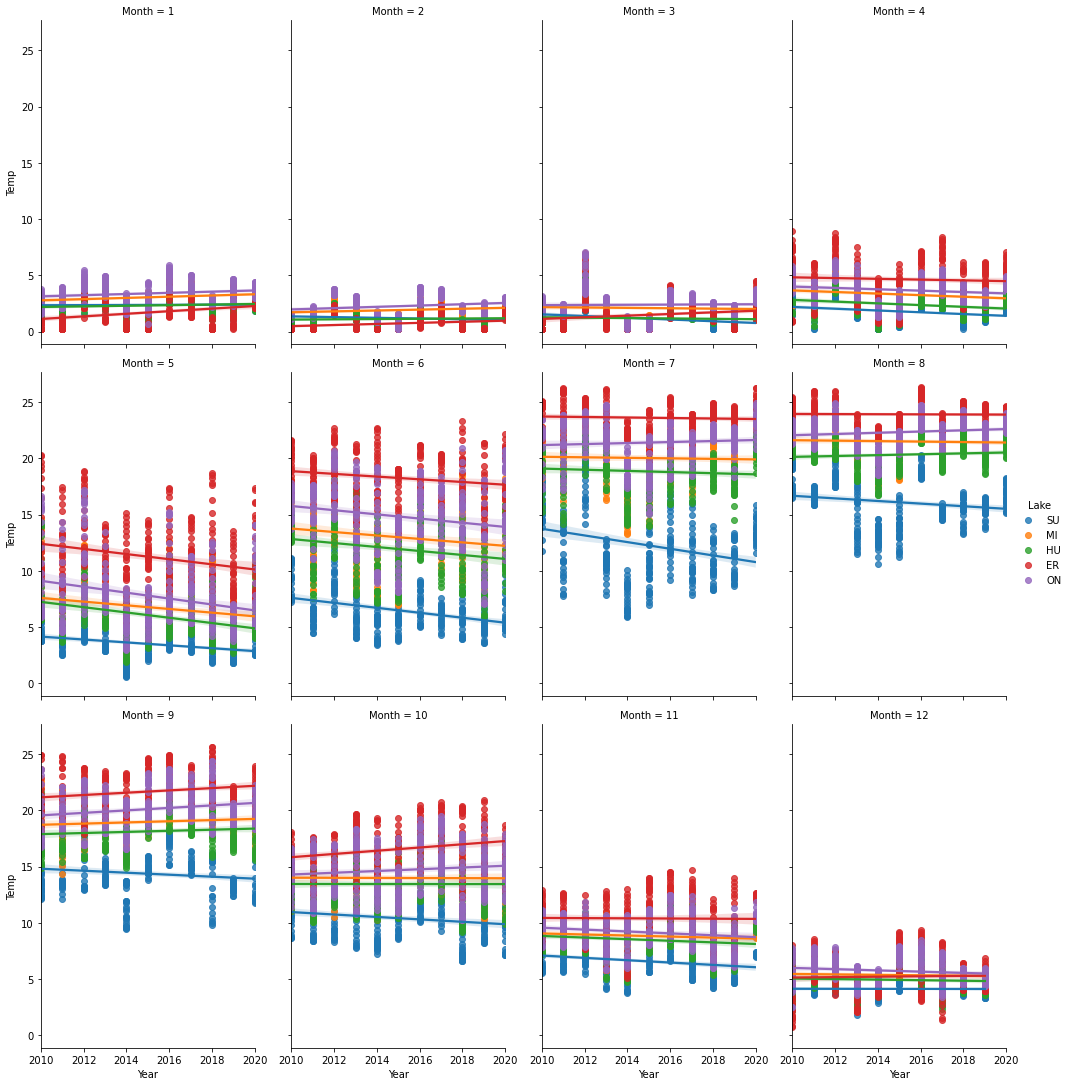

In [106]:
g=sns.lmplot(x="Year", y="Temp", hue="Lake", col='Month',data=temp_data,order=1,
           col_wrap=4, height=5, aspect=.7,sharey=True)
g

### Adding some stats
This is one of my favorite plots, it's so easy to make but shows a lot of information. In fact I used this plot in my thesis proposal.

For your reference, I added a few more commans here to edit my figure.

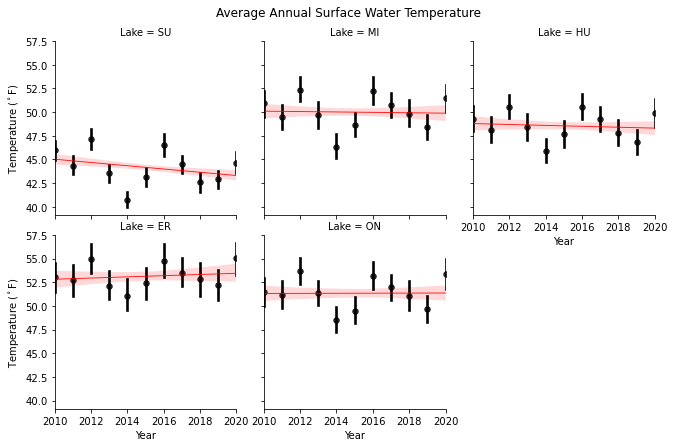

In [161]:
g=sns.lmplot(x="Year", y="Temp_F", col="Lake", x_estimator=np.mean, ci=95,fit_reg=True,
             data=temp_data,col_wrap=3, height=4, 
             line_kws={'color': 'red','alpha': 0.9, 'lw':.9},scatter_kws={'s': 30, 'alpha': 0.8, 'color':'black'})

#figure level changes
g.fig.set_size_inches(9,6)
g.fig.suptitle(f'Average Annual Surface Water Temperature')
g.fig.subplots_adjust(wspace=.15,top=.9)

#all the commands are showed you earlier can be attached to each other!! these are subplot level changes
g.set_axis_labels("Year", 'Temperature ($^\circ$F)').set(xlim=(2010, 2020))

#to save
g.savefig(data_out_directory+"gl_temp_over_time.pdf")

Again: If a seaborn plot has the following text in the description **'This is an Axes-level function'** then you need to map it on to a facetgrid or matplot fig object like I did for scatterplot. 

If it says **'Figure-level interface for drawing relational plots onto a FacetGrid.'** then you don't need to use this mapping technique because this plot type is already built on facegrid. 

# 17.4 Revisit violinplots

Cat plots- the figure level version of violin plots
https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

Cat plots are figure level version of violinplots. Let's try to make the sameplot we make before but with catplot.

We want a 2 (rows) by 3 (cols) figure, where each subplot holds a violin plot for each generation(your col value, and x). The value represented in the violinplots is Attack (your y val) and there is  violin for each Type 1 (your hue val).

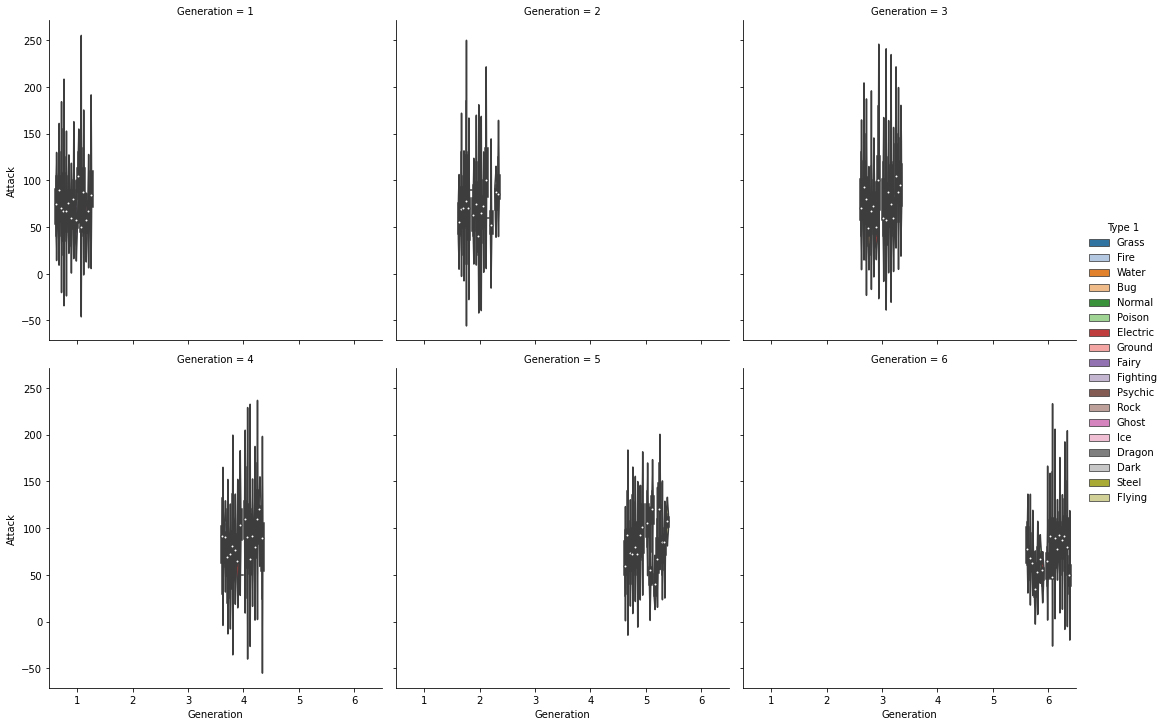

In [21]:
g = sns.catplot(x="Generation", y="Attack",col="Generation", hue="Type 1",data=pokemon,
                col_wrap=3, kind="violin", palette='tab20')
g

## Note: 

Notice this doesn't look as nice as our other plot. This is because in facetgrid every subplot has the same x and y axis and the only difference is the value we selected with cols. When we map sns.violinplot to the grid each subplot can hold 1 generation but with catplot each subplot has a space for every generation. 

This is all to say that while plotting functions with facetgrid included (like catplot) are powerfull it will not always work for what you need and you will need to go back to the mapping technique or old school for loops.

Here is an okay figure for this data using catplot, I changed to boxplots for space:

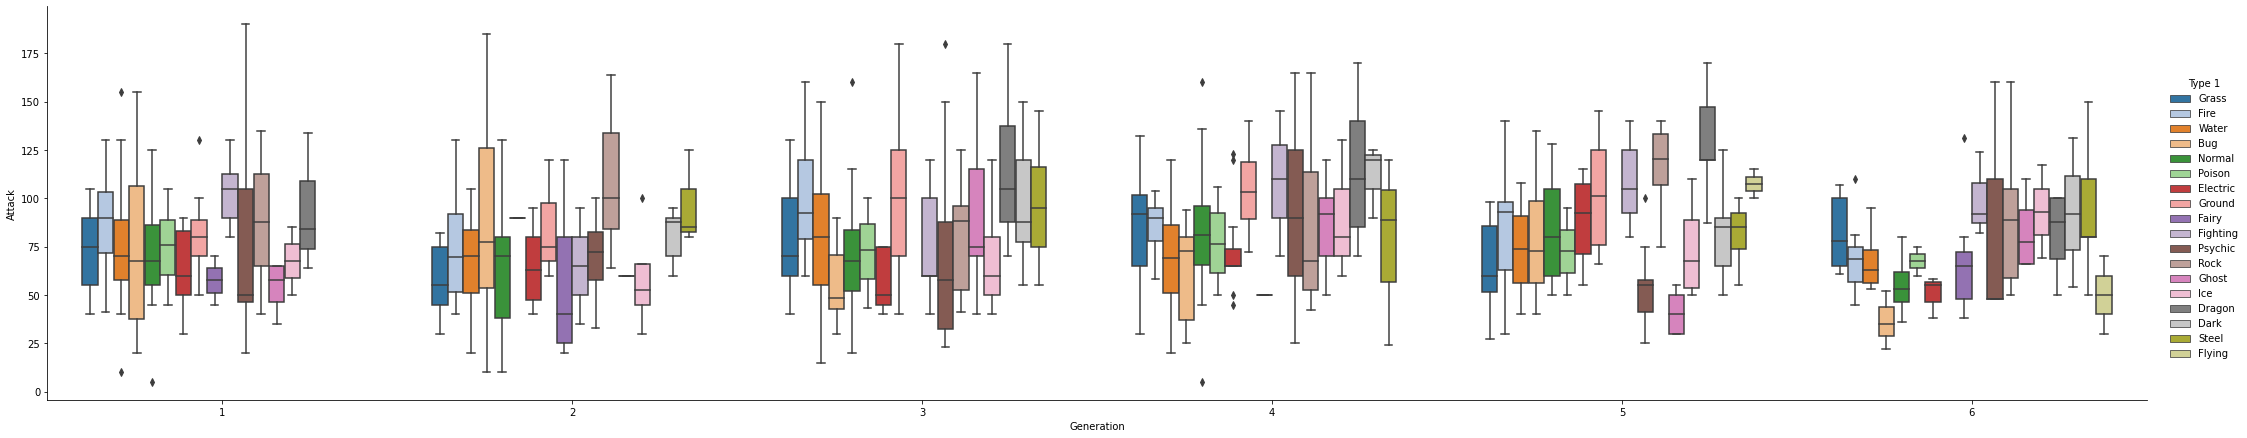

In [55]:
g = sns.catplot(x="Generation", y="Attack", hue="Type 1",data=pokemon, kind="box",
                palette='tab20', height=6, aspect=5)
g

# 17.5 Example with for loop

In [56]:
#for reference
pokemon.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In this case I want to make subplots of some stat_x v stat_y. 

My first ituition was to use relplot (the figure level version of scatterplot). However, facetgrid requires that I have categories to choose from in my table. Sure I could reshape the pokemon table mand make a plotting function to make it work with facetgrid but it would take me more code/time to do it that way than if I did it with a for loop. Besides I want to add some text so I think a foor loop is best here.

Takeaway: there are multiple ways to solve problems, always go with the solution that you find easiest.

#### more on relplot https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

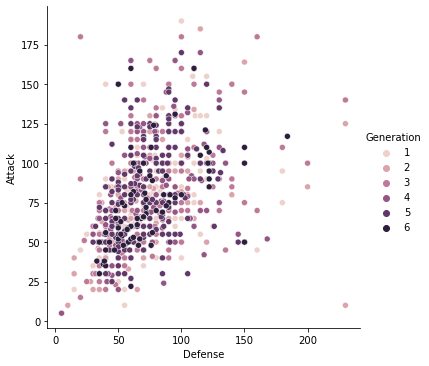

In [58]:
#first attemp
sns.relplot(data=pokemon,x="Defense", y="Attack", hue="Generation")

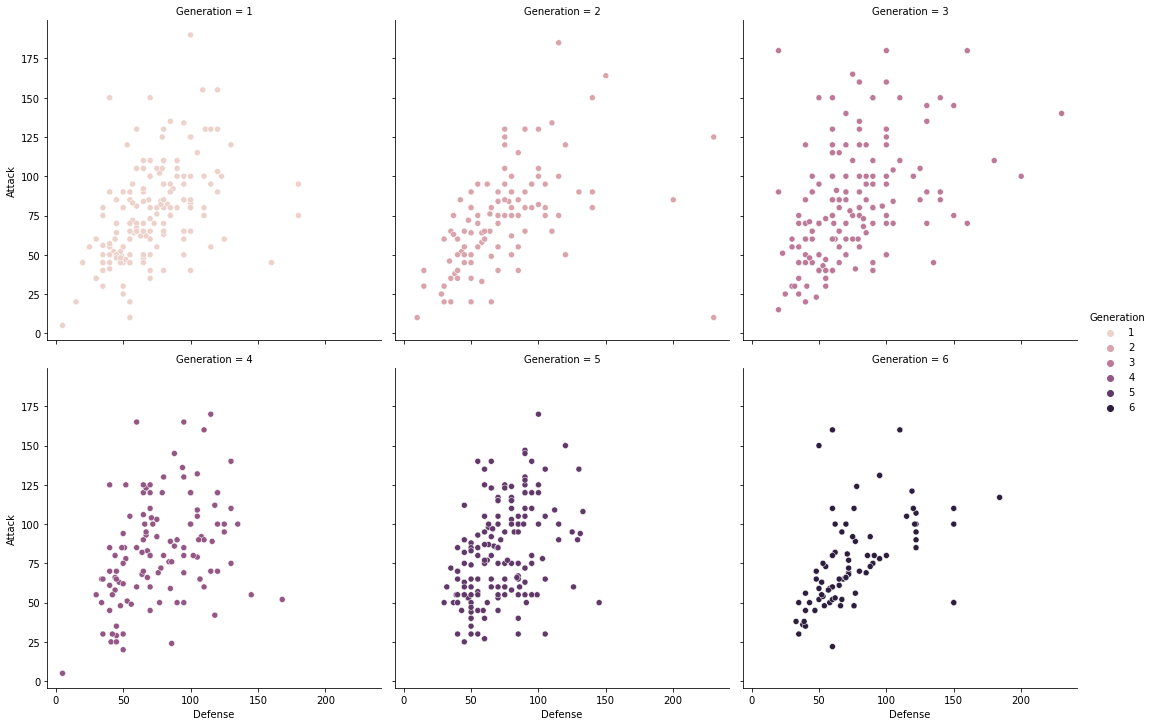

In [60]:
#second attemp
sns.relplot(data=pokemon,x="Defense", y="Attack",col='Generation',hue="Generation",col_wrap=3)

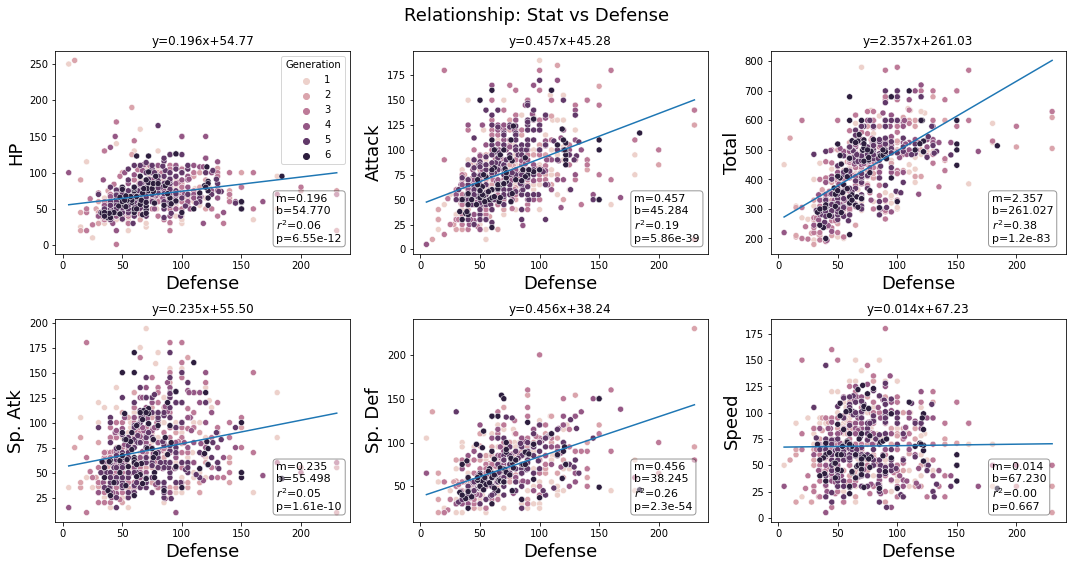

In [25]:
#set up working space we will add subplots with the for loop
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)


#select stats for y_axis wanted, this will change the number of subplots- 
#only upto 2*3 otherwise change subplot num in for loop----------EDIT to change loop
stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
#select the stat for the x_axis--------EDIT to change loop
x_stat='Defense'


#set figure size
fig.set_size_inches(15,8)

for count,y_stat in enumerate(stats_all):
    #remember that for position we need three numbers, they need to be intergers 
    ax = fig.add_subplot(2, 3, int(count+1))
    
    #let's create a boolean command so only the first subplot had a legend for generation
    if count>0:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
    else:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')
        
    ax.set_xlabel(x_stat,fontsize=18)
    ax.set_ylabel(y_stat,fontsize=18)

    #regplot doesn't print any stats so let's use scipy to get some stats and add it to our plots
    ##get stats for a label
    #we use [[]] to select columns from dataframes
    temp=pokemon[[x_stat,y_stat]].dropna()
    #same as pokemon.loc[,[x_stat,y_stat]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    #print (results)

    ##this code makes the labels in the box
    props=dict(boxstyle='round',facecolor='white',alpha=.4)
    #here is a useful example of .format where you can chane the number format
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.2f}\np={:.3}'.format(results[0],results[1],results[2]**2,results[3]) #grabs the values from stats_out
    ax.text(.75,.05,textstr,transform=ax.transAxes,va='bottom',fontsize=11,bbox=props) #change the formatting of the box

    #this code here allows me to make a line manually
    x1=np.array([temp[x_stat].min(),temp[x_stat].max()])
    y1=results[0]*x1+results[1]
    #this will plot my line on top of the line from regplot
    ax.plot(x1,y1)

    ## add line equation as a title
    m=results[0]
    b=results[1]
    ax.set_title('y={:.3f}x+{:.2f}'.format(m,b))

#add a figure title
plt.suptitle(f'Relationship: Stat vs {x_stat}',fontsize=18)

#show my figure
plt.tight_layout()
plt.show()

#to save
#plt.savefig(data_out_directory+"pokemon_scatter.pdf")

## [SEABORN GALLERY](http://seaborn.pydata.org/examples/index.html)

# 18. SciPy Intro

"SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python." Pandas and NumPy are built in SciPy.

### **[Documentation](https://docs.scipy.org/doc/scipy/reference/index.html)**

We load as:

`import scipy`

`from scipy import stats`



### **[List of functions](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)**

### **[List of stats functions](https://docs.scipy.org/doc/scipy/reference/reference/stats.html#module-scipy.stats)**

### [Tutorials](https://scipy-lectures.org/packages/statistics/index.html)

In [66]:
def get_stats(x_stat,y_stat):
    temp=pokemon[[x_stat,y_stat]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    return results

get_stats('Attack','Defense')

LinregressResult(slope=0.4214697546209381, intercept=40.54586254775261, rvalue=0.43868705511848927, pvalue=5.8584798642899356e-39, stderr=0.030562990492152126, intercept_stderr=2.6101153995017197)

# 18.1 t-test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [14]:
lake_SU=temp_data.loc[temp_data['Lake']=='SU','Temp_F']
lake_ER=temp_data.loc[temp_data['Lake']=='ER','Temp_F']

#one side- test value of a population mean
print(stats.ttest_1samp(lake_SU, 0))

#two sided- test diff across two populations
print(stats.ttest_ind(lake_SU,lake_ER))

Ttest_1sampResult(statistic=285.38998623785227, pvalue=0.0)
Ttest_indResult(statistic=-30.425098008816494, pvalue=2.0849785964672296e-192)


# 18.2 KS test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [67]:
lake_SU=temp_data.loc[temp_data['Lake']=='SU','Temp_F']
lake_ER=temp_data.loc[temp_data['Lake']=='ER','Temp_F']

print(stats.ks_2samp(lake_SU, lake_ER))

KstestResult(statistic=0.3125, pvalue=1.5212209076159047e-171)


# 18.3 one way Anova
https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway

In [70]:
from scipy.stats import f_oneway

lake_SU=temp_data.loc[temp_data['Lake']=='SU','Temp_F']
lake_MI=temp_data.loc[temp_data['Lake']=='MI','Temp_F']
lake_HU=temp_data.loc[temp_data['Lake']=='HU','Temp_F']
lake_ER=temp_data.loc[temp_data['Lake']=='ER','Temp_F']
lake_ON=temp_data.loc[temp_data['Lake']=='ON','Temp_F']

F, p=f_oneway(lake_SU, lake_MI, lake_HU, lake_ER,lake_ON)
print (F,p)

263.04083214235123 1.1849113160439844e-220


# 18.4 Linear Models
https://www.statsmodels.org/stable/index.html

In [19]:
from statsmodels.formula.api import ols

selected_lake=temp_data.loc[temp_data['Lake']=='SU']

model = ols("Temp_F ~ Day + Lake", selected_lake).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Temp_F   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     1681.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          9.33e-307
Time:                        21:21:09   Log-Likelihood:                -13964.
No. Observations:                3968   AIC:                         2.793e+04
Df Residuals:                    3966   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9482      0.259    134.737      0.0

# Summary
Today I showed you the following:

1. Explore data with the seaborn plotting library
2. Write functions to make figures from daframes
3. Make figures with FacetGrid and save figures
4. Reference SciPy for stats

# Homework

1. Tomorrow we will make some maps and gifs so please make sure you have the following libraries istalled. In you run the next cell and you get errors it means that you need to install the libraries.

In [26]:
import netCDF4 as nc
import xarray as xr
import cartopy
import glob

To install these, open a new terminal and use the following commands:
Type in one command at a time and follow the prompt in the terminal. I suggest installing in the order I have here.
    
`conda install -c anaconda netcdf4`

`conda install -c conda-forge xarray`

`conda install -c conda-forge cartopy`

`conda install -c conda-forge glob2`


2. Make a folder inside your output folder named for_gif. This will hold the images(frames) that we will make tomorrow and use to make a gif.

3. Let's practice making figures pretty. Look at the Day 7 notbook and some of the edits we made today for reference. 

We will only use the spring of 2010 year for the sake of computing time. Each year has ~1600 datapoints so 20 years of data is a lot. I've selected data for some dates when I know temp change a lot in the spand of a month.

- add a title
- rotate the x ticks [info_here](https://stackabuse.com/rotate-axis-labels-in-matplotlib/)
- change the y label to 'Temperature F' 
- change the format of the legen so we have 5 columns, 1 per lake [legend_info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

In [91]:
temp_data_subset=temp_data.loc[temp_data['date'].between('2010-03-21','2010-04-20')].copy()
temp_data_subset

,Day,Year,Temp,Lake,Temp_F,date,Month
79,80,2010,1.49,SU,34.682,2010-03-21,3
80,81,2010,1.49,SU,34.682,2010-03-22,3
81,82,2010,1.26,SU,34.268,2010-03-23,3
82,83,2010,1.42,SU,34.556,2010-03-24,3
83,84,2010,1.60,SU,34.880,2010-03-25,3
...,...,...,...,...,...,...,...
15989,106,2010,4.53,ON,40.154,2010-04-16,4
15990,107,2010,4.56,ON,40.208,2010-04-17,4
15991,108,2010,4.60,ON,40.280,2010-04-18,4
15992,109,2010,4.63,ON,40.334,2010-04-19,4


In [ ]:
# I've set up the figure space for you
fig, ax = plt.subplots(figsize=(7,5))
#the data to plot is here 
sns.lineplot(x="date", y="Temp_F", hue="Lake",data=temp_data_subset,palette="Set1", ax=ax)
ax.set_xlabel('Time')


#modifications---your code in each section

#title


#rotate ticks


#set ylabel name


#make legend 5 cols and move to top left


##let's view
plt.tight_layout()
plt.show()

4. Use seaborn to explore some of your own data.

# Answer

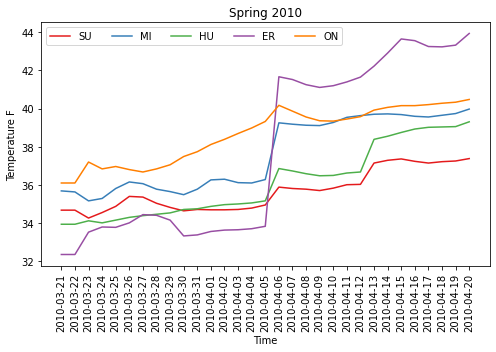

In [94]:
# I've set up the figure space for you
fig, ax = plt.subplots(figsize=(7,5))
#the data to plot is here 
sns.lineplot(x="date", y="Temp_F", hue="Lake",data=temp_data_subset,palette="Set1", ax=ax)
ax.set_xlabel('Time')


#modifications

#title
ax.set_title('Spring 2010')

#rotate ticks
plt.xticks(rotation = 90)

#set ylabel name
ax.set_ylabel('Temperature F')

#make legend 5 cols and move to top left
plt.legend(ncol=5,loc='upper left')

##let's view
plt.tight_layout()
plt.show()